In [1]:
import numpy as np
import scipy
import seaborn as sns
import pandas as pd
 
import patsy

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')



In [2]:
#loading data from below link https://dev.socrata.com/foundry/data.sfgov.org/rptz-7xyh
#Air Traffic Passenger Statistics
air_traffic_stats = '/Users/aishwaryachinnari/Desktop/myproj/D/pandas/csvfiles/project3/rptz-7xyh.csv'

In [3]:
ats = pd.read_csv(air_traffic_stats)

In [4]:
ats.shape

(15007, 16)

In [5]:
ats.head(2)

,activity_period,activity_type_code,adjusted_activity_type_code,adjusted_passenger_count,boarding_area,geo_region,geo_summary,month,operating_airline,operating_airline_iata_code,passenger_count,price_category_code,published_airline,published_airline_iata_code,terminal,year
0,200507,Deplaned,Deplaned,27271,B,US,Domestic,July,ATA Airlines,TZ,27271,Low Fare,ATA Airlines,TZ,Terminal 1,2005
1,200507,Enplaned,Enplaned,29131,B,US,Domestic,July,ATA Airlines,TZ,29131,Low Fare,ATA Airlines,TZ,Terminal 1,2005


In [6]:
ats.columns

Index([u'activity_period', u'activity_type_code',
       u'adjusted_activity_type_code', u'adjusted_passenger_count',
       u'boarding_area', u'geo_region', u'geo_summary', u'month',
       u'operating_airline', u'operating_airline_iata_code',
       u'passenger_count', u'price_category_code', u'published_airline',
       u'published_airline_iata_code', u'terminal', u'year'],
      dtype='object')

In [7]:
ats['operating_airline'].unique()


array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines', 'British Airways',
       'Cathay Pacific', 'China Airlines', 'Delta Air Lines',
       'EVA Airways', 'Frontier Airlines', 'Hawaiian Airlines',
       'Horizon Air ', 'Icelandair', 'Independence Air', 'Japan Airlines',
       'KLM Royal Dutch Airlines', 'Korean Air Lines',
       'Lufthansa German Airlines', 'Mesa Airlines', 'Mexicana Airlines',
       'Midwest Airlines', 'Northwest Airlines', 'Philippine Airlines',
       'Singapore Airlines', 'SkyWest Airlines', 'Sun Country Airlines',
       'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas A

In [8]:
ats.isnull().sum()

activity_period                 0
activity_type_code              0
adjusted_activity_type_code     0
adjusted_passenger_count        0
boarding_area                   0
geo_region                      0
geo_summary                     0
month                           0
operating_airline               0
operating_airline_iata_code    54
passenger_count                 0
price_category_code             0
published_airline               0
published_airline_iata_code    54
terminal                        0
year                            0
dtype: int64

In [9]:
ats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
activity_period                15007 non-null int64
activity_type_code             15007 non-null object
adjusted_activity_type_code    15007 non-null object
adjusted_passenger_count       15007 non-null int64
boarding_area                  15007 non-null object
geo_region                     15007 non-null object
geo_summary                    15007 non-null object
month                          15007 non-null object
operating_airline              15007 non-null object
operating_airline_iata_code    14953 non-null object
passenger_count                15007 non-null int64
price_category_code            15007 non-null object
published_airline              15007 non-null object
published_airline_iata_code    14953 non-null object
terminal                       15007 non-null object
year                           15007 non-null int64
dtypes: int64(4), object(12)
memory usage: 1.8+

In [10]:
clean_data = ats.dropna()

In [11]:
clean_data.isnull().sum()

activity_period                0
activity_type_code             0
adjusted_activity_type_code    0
adjusted_passenger_count       0
boarding_area                  0
geo_region                     0
geo_summary                    0
month                          0
operating_airline              0
operating_airline_iata_code    0
passenger_count                0
price_category_code            0
published_airline              0
published_airline_iata_code    0
terminal                       0
year                           0
dtype: int64

In [12]:
## Try to use a list comprehension
## Mario
ats_col = ats.columns.tolist()

## nc = [x for x in ats.column if x!=[;;;;;]]

In [13]:
del ats['activity_period']

In [14]:
del ats['adjusted_activity_type_code']

In [15]:
del ats['boarding_area']

In [16]:
del ats['adjusted_passenger_count']

In [17]:
del ats['terminal']

In [18]:
ats1=ats.columns

In [19]:
ats.head(2)

,activity_type_code,geo_region,geo_summary,month,operating_airline,operating_airline_iata_code,passenger_count,price_category_code,published_airline,published_airline_iata_code,year
0,Deplaned,US,Domestic,July,ATA Airlines,TZ,27271,Low Fare,ATA Airlines,TZ,2005
1,Enplaned,US,Domestic,July,ATA Airlines,TZ,29131,Low Fare,ATA Airlines,TZ,2005


In [20]:
del ats['published_airline_iata_code']

In [21]:
ats.head(10)

,activity_type_code,geo_region,geo_summary,month,operating_airline,operating_airline_iata_code,passenger_count,price_category_code,published_airline,year
0,Deplaned,US,Domestic,July,ATA Airlines,TZ,27271,Low Fare,ATA Airlines,2005
1,Enplaned,US,Domestic,July,ATA Airlines,TZ,29131,Low Fare,ATA Airlines,2005
2,Thru / Transit,US,Domestic,July,ATA Airlines,TZ,5415,Low Fare,ATA Airlines,2005
3,Deplaned,Canada,International,July,Air Canada,AC,35156,Other,Air Canada,2005
4,Enplaned,Canada,International,July,Air Canada,AC,34090,Other,Air Canada,2005
5,Deplaned,Asia,International,July,Air China,CA,6263,Other,Air China,2005
6,Enplaned,Asia,International,July,Air China,CA,5500,Other,Air China,2005
7,Deplaned,Europe,International,July,Air France,AF,12050,Other,Air France,2005
8,Enplaned,Europe,International,July,Air France,AF,11638,Other,Air France,2005
9,Deplaned,Australia / Oceania,International,July,Air New Zealand,NZ,4998,Other,Air New Zealand,2005


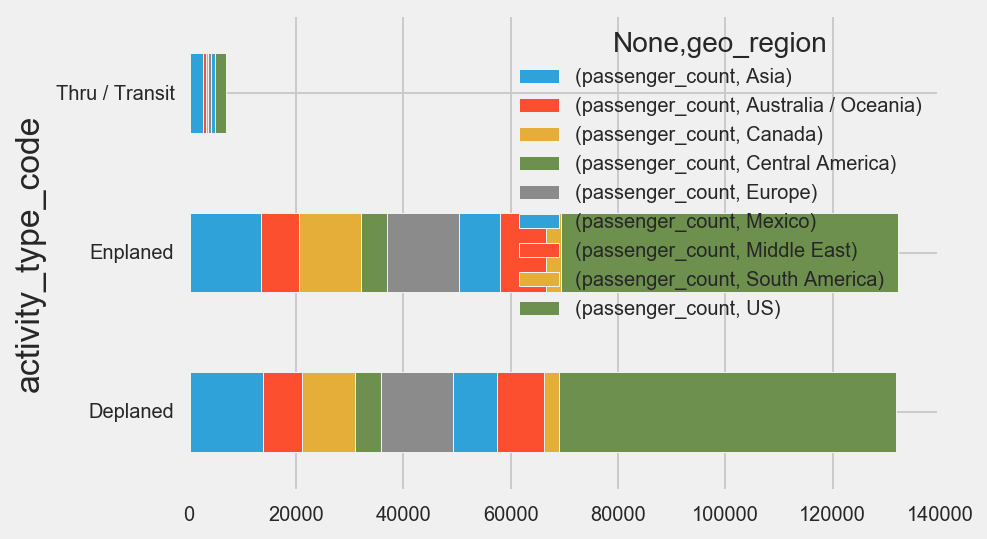

In [22]:
ats.groupby(['activity_type_code','geo_region'])[['passenger_count']].mean().unstack().plot(kind="barh", stacked=True)



# .reset_index()
# ats_ave_pass_count.head(3)


#.count().reset_index()

1. Asia has the lowest amount of passenger_count per activity_type_code

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1170c19d0>]], dtype=object)

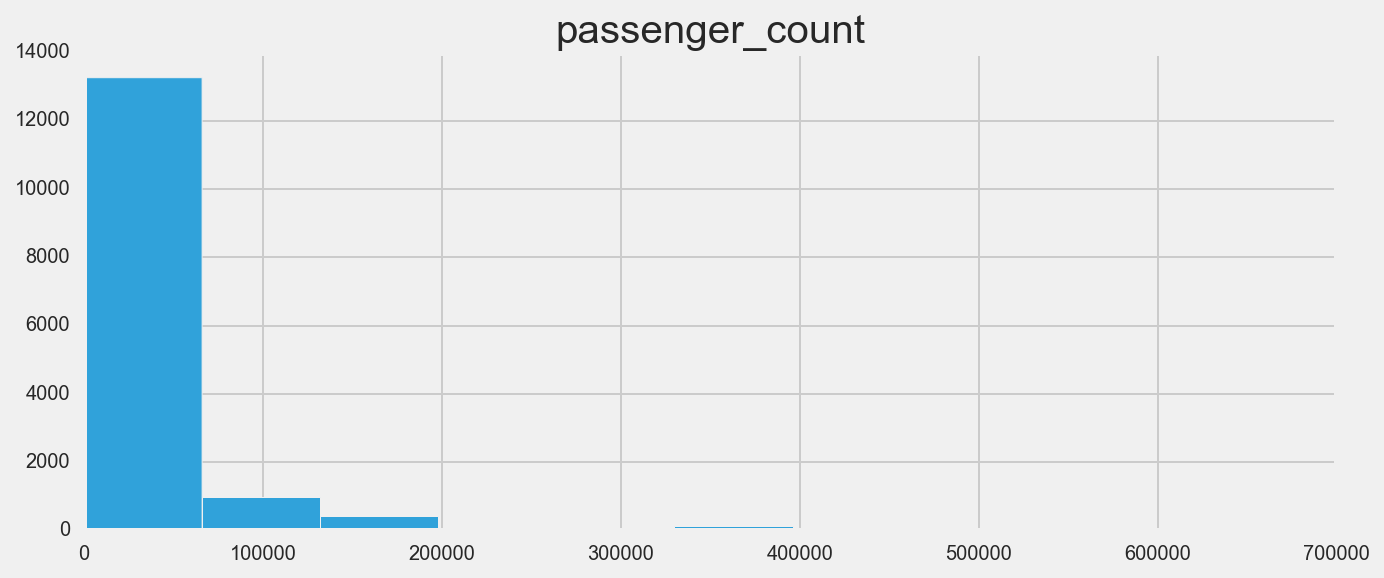

In [23]:
ats.hist('passenger_count', figsize=(10,4))
#ats_ave_pass_count.hist('passenger_count', figsize=(10,4))

In [24]:
#### Mario
ats.groupby?

In [25]:
## set up a linear regression
## and plot the predicted values vs true values

In [26]:
ats.groupby(['activity_type_code','geo_region']).count().reset_index()

,activity_type_code,geo_region,geo_summary,month,operating_airline,operating_airline_iata_code,passenger_count,price_category_code,published_airline,year
0,Deplaned,Asia,1591,1591,1591,1590,1591,1591,1591,1591
1,Deplaned,Australia / Oceania,325,325,325,325,325,325,325,325
2,Deplaned,Canada,702,702,702,702,702,702,702,702
3,Deplaned,Central America,137,137,137,136,137,137,137,137
4,Deplaned,Europe,999,999,999,994,999,999,999,999
5,Deplaned,Mexico,480,480,480,480,480,480,480,480
6,Deplaned,Middle East,107,107,107,107,107,107,107,107
7,Deplaned,South America,45,45,45,45,45,45,45,45
8,Deplaned,US,2685,2685,2685,2664,2685,2685,2685,2685
9,Enplaned,Asia,1592,1592,1592,1592,1592,1592,1592,1592


In [27]:
filter(lambda pair: pair[1] > 0,[(4,1),(3,-2),(8,0)])

[(4, 1)]

In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

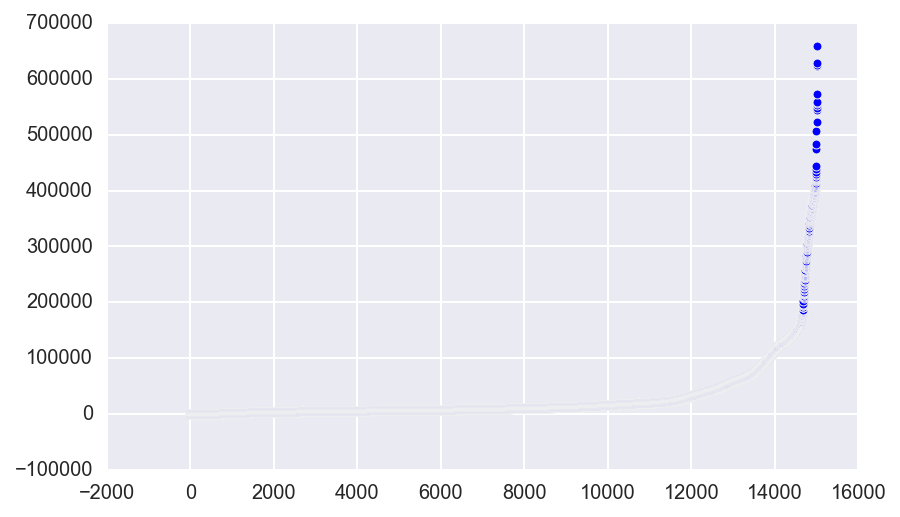

In [32]:
plt.scatter(range(len(ats.passenger_count.sort_values())),ats.passenger_count.sort_values())

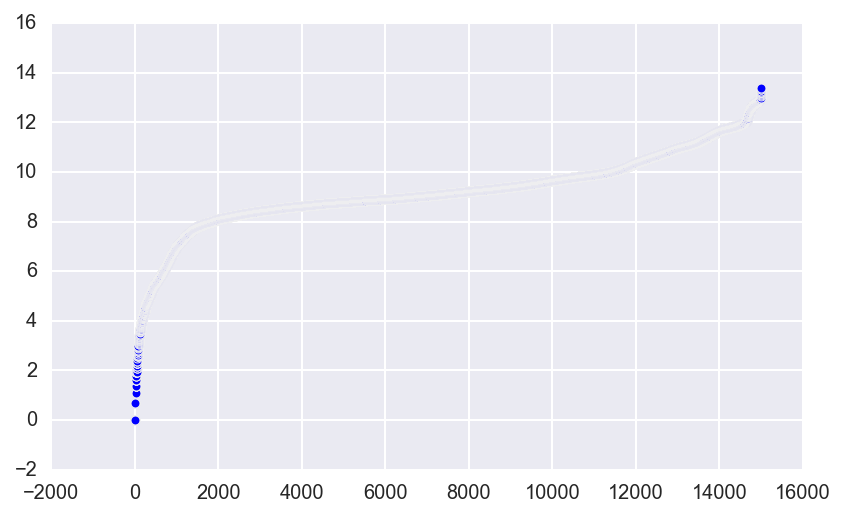

In [37]:
plt.scatter(range(len(ats.passenger_count.sort_values())),ats.passenger_count.sort_values().apply(lambda x:np.log(x)))

In [38]:
def calculate_yhat(x, b0, b1):
    return b0 + b1*x

In [70]:
passenger_count = ats.passenger_count.values/1000.
geo_region = ats.passenger_count.values 

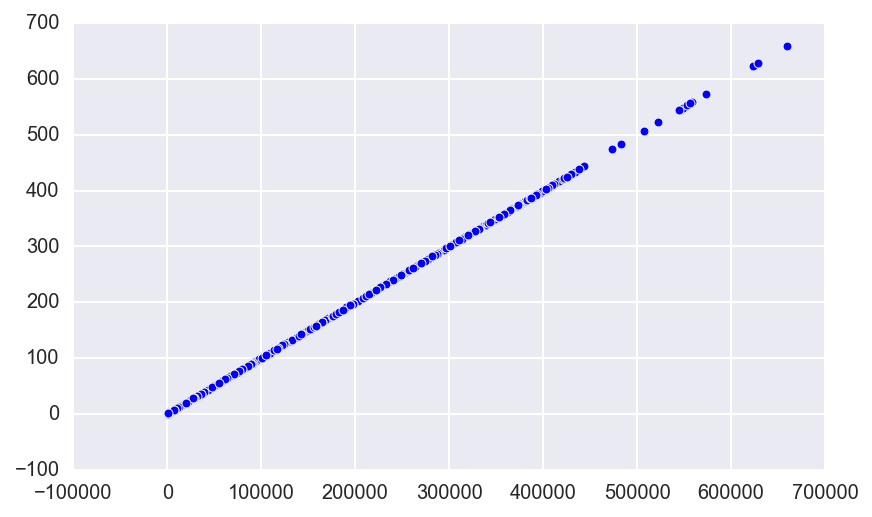

In [71]:
passenger_count[0:5]
plt.scatter(geo_region, passenger_count)

In [72]:
def calculate_residuals(y, yhat):
    return y - yhat

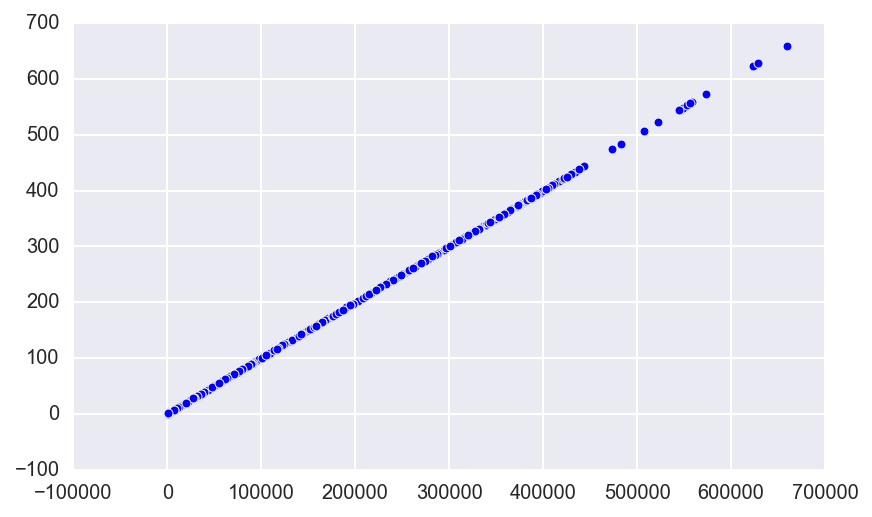

In [73]:
ats[0:5]
plt.scatter(geo_region, passenger_count)


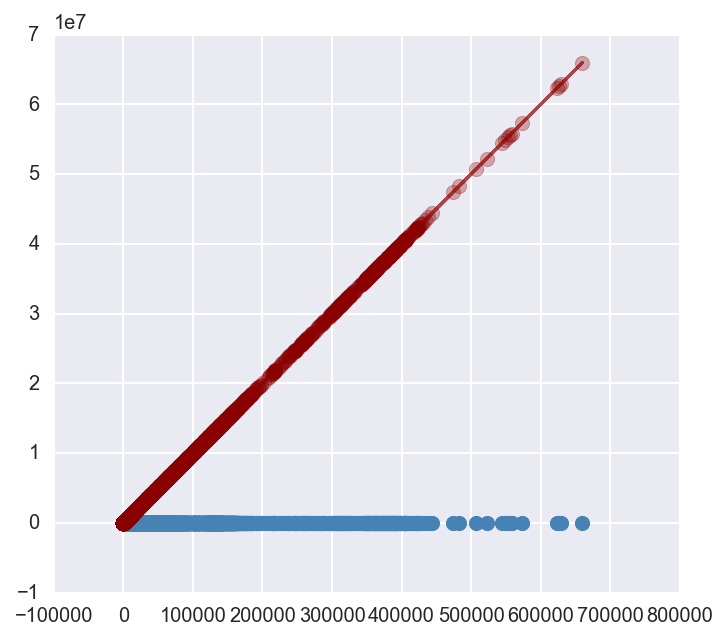

In [74]:
b0 = 10
b1 = 100

def plot_regression(x, y, b0, b1):
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    
    yhat = calculate_yhat(x, b0, b1)
    
    ax.scatter(x, y, color='steelblue', s=50)
    ax.scatter(x, yhat, color='darkred', s=50, alpha=0.3)
    
    ax.plot(x, yhat, color='darkred', linewidth=1.5, alpha=0.7)
    plt.show()

plot_regression(geo_region,passenger_count , b0, b1)

In [75]:
def sum_sq_errors(errors):
    return np.sum(errors**2)

In [76]:
passenger_count_hat = calculate_yhat(geo_region, b0, b1)
print passenger_count_hat[0:5]
residuals = calculate_residuals(passenger_count, passenger_count_hat)
print residuals[0:5]
sq_resids = sum_sq_errors(residuals)
print sq_resids

[2727110 2913110  541510 3515610 3409010]
[-2727082.729 -2913080.869  -541504.585 -3515574.844 -3408975.91 ]
6.38678009873e+17


In [68]:
print sum_sq_errors(calculate_residuals(passenger_count, calculate_yhat(geo_region, b0, b1)))


993138083459.0


In [69]:
print sum_sq_errors(calculate_residuals(passenger_count, calculate_yhat(geo_region, b0, b1)))

993138083459.0


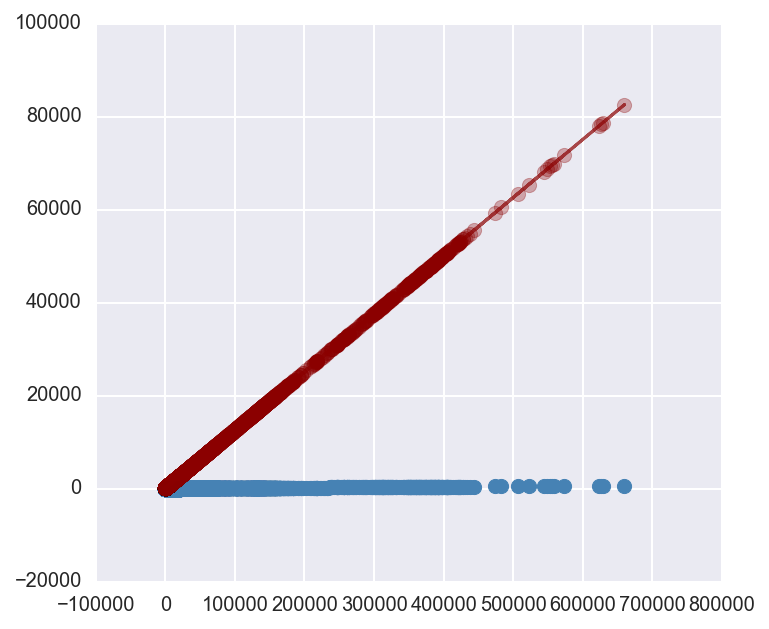

In [63]:
b0 = 100
b1 = .125
plot_regression(geo_region,passenger_count,b0,b1)